
# **<font color='white gray'>Data Science for Multivariate Data Analysis</font>**
### <font color='white gray'>Data Science in Sales - Identifying Factors Influencing Purchase Decisions</font>


---

## **Business Problem Definition**

Imagine that you work for a large retail company, and the managers want to understand the main factors that determine customer purchasing behavior.

The company has various metrics collected on shopping habits, but the managers are unclear about which dimensions are the most relevant.

These are the available variables:

- `purchase_frequency`: Number of times the customer buys per month.
- `avg_spent`: Average amount spent per purchase.
- `top_category`: Value from 1 to 10 indicating the product category.
- `store_time`: Average time (in minutes) the customer spends in the store per visit.
- `app_usage`: Score (from 1 to 10) indicating the frequency of app usage.

Objective: Perform a factor analysis to reduce the dimensionality of the data and identify the latent factors that explain most of the variance in customer purchasing behavior.


## **Installing and Loading Packages**


In [7]:
# To update a package, run the command below in the terminal or command prompt:
# pip install -U package_name

# To install an exact version of a package, run the command below in the terminal or command prompt:
# !pip install package_name==desired_version

# After installing or updating the package, restart the Jupyter Notebook.

# Install the watermark package.
# This package is used to record the versions of other packages used in this Jupyter Notebook.
# !pip install -q -U watermark

https://pypi.org/project/factor-analyzer/

In [8]:
!pip install watermark

In [9]:
!pip install -q factor_analyzer

In [10]:
# Imports
import pandas as pd
import numpy as np
import factor_analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt

In [11]:
# Versions of the packages used in this Jupyter Notebook
%reload_ext watermark
%watermark -a "panData"


Author: panData



## **Loading the Data**


In [12]:
# Load the dataset
df = pd.read_csv('dataset.csv')

In [13]:
df.shape

(500, 5)

In [14]:
df.head()

,purchase_frequency,avg_spent,top_category,store_time,app_usage
0,6,264.693919,1,10.741316,2
1,6,154.865295,2,54.727444,2
2,5,212.729267,4,9.244390,4
3,5,270.765917,3,11.176717,5
4,4,85.332091,2,17.059377,2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   purchase_frequency  500 non-null    int64  
 1   avg_spent           500 non-null    float64
 2   top_category        500 non-null    int64  
 3   store_time          500 non-null    float64
 4   app_usage           500 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 19.7 KB



## **Checking Data Adequacy with Bartlett's Test of Sphericity**

The `calculate_bartlett_sphericity()` function is often used in Factor Analysis to test the hypothesis of Bartlett’s sphericity. Sphericity refers to the suitability of the data for factor analysis. If the data are perfectly spherical, it indicates that factor analysis may not be suitable because the variables are not correlated.

Here's how to interpret the result of this function:

**Test Statistic**: This quantifies how much your data differ from sphericity. Higher values indicate that the variables have significant correlations with each other, making factor analysis potentially appropriate.

**P-value**: As in most statistical tests, the p-value helps determine the significance of the test. A low p-value (typically less than 0.05) rejects the null hypothesis of sphericity, indicating that the variables are correlated and factor analysis may be appropriate. A high p-value suggests that the data are close to sphericity, meaning the variables are not strongly correlated, which may make factor analysis less appropriate.

In summary, to proceed with factor analysis:

- If the p-value is less than 0.05 (or another chosen significance threshold), this indicates that the variables are sufficiently correlated, making factor analysis appropriate.
- If the p-value is greater than 0.05, caution should be exercised when proceeding with factor analysis, as the variables may not be sufficiently correlated.

However, remember that the decision to proceed with factor analysis should not be based solely on Bartlett's test of sphericity. Other considerations and tests, such as the Kaiser-Meyer-Olkin (KMO) test, should also be taken into account when assessing the suitability of factor analysis.

In [16]:
# Checking data adequacy
chi_square_value, p_value = calculate_bartlett_sphericity(df)

In [17]:
print('Test Statistic:', chi_square_value, '\nP-value:', p_value)

Test Statistic: 2052.929448184787 
P-value: 0.0


> If the p-value is less than 0.05, the data are suitable for factor analysis.


## **Checking Data Adequacy with the Kaiser-Meyer-Olkin (KMO) Test**

The Kaiser-Meyer-Olkin (KMO) test is another measure of adequacy for Factor Analysis (or Principal Component Analysis). The KMO test assesses the proportion of variance among the observed variables that can be attributed to underlying factors.

The KMO measure is a value that ranges from 0 to 1. Values close to 1 indicate that the partial correlations among variables are small compared to the total correlations, suggesting that the factor structure is strong and clear. Values close to 0 suggest the opposite.

Here's how to interpret KMO values:

- **KMO Value Less than 0.50**: Inadequate for factor analysis.
- **KMO Value between 0.50 and 0.70**: Mediocre. Factor analysis may not be very useful but can still be performed.
- **KMO Value between 0.70 and 0.80**: Good. This suggests that factor analysis should be useful with the data.
- **KMO Value between 0.80 and 0.90**: Great. Indicates that the factor structure of the data is strong.
- **KMO Value above 0.90**: Excellent. A strong indication for factor analysis.

In addition to the overall KMO measure, many implementations of the KMO test also provide individual KMO measures for each variable. Individual variables with KMO values below 0.50 can be considered for exclusion from the analysis, as they are not well correlated with the other variables.


In [18]:
# Checking data adequacy using the Kaiser-Meyer-Olkin (KMO) test
kmo_all, kmo_model = calculate_kmo(df)

In [19]:
print('Global KMO:', kmo_model)

Global KMO: 0.9119977905988943


In [20]:
print('KMO Per Variable:', kmo_all)


KMO Per Variable: [0.91498647 0.91967945 0.90208801 0.91444814 0.90950008]


If the overall KMO value is greater than 0.6, factor analysis can be considered useful.


---
## **Factor Analysis**

When using `FactorAnalyzer` to perform Factor Analysis, you are attempting to identify latent factors (not directly observed) that can explain the variation and covariation among the observed variables in your dataset.


In [21]:
# Create the factor analyzer
fa = FactorAnalyzer(rotation="varimax")

In [22]:
# Fit the factor analyzer
fa.fit(df)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

> Based on the elbow plot, we can choose the number of factors where the values start to stabilize.


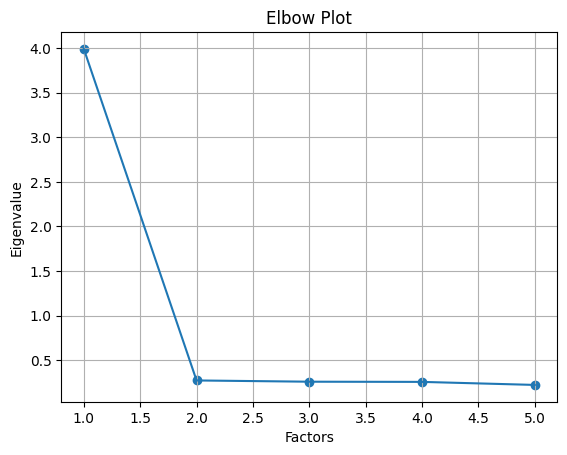

In [23]:
# Checking the eigenvalues
eigen_values, vectors = fa.get_eigenvalues()
plt.scatter(range(1, df.shape[1] + 1), eigen_values)
plt.plot(range(1, df.shape[1] + 1), eigen_values)
plt.title('Elbow Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [24]:
import random
random.seed(1)

In [25]:
# Performing factor analysis with 2 factors
fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(df)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [26]:
# Checking the factor loadings
loadings = fa.loadings_
print(loadings)

[[0.77025527 0.3985401 ]
 [0.73479724 0.4260281 ]
 [0.53652225 0.84092422]
 [0.74905294 0.42623636]
 [0.7418765  0.44453942]]


In [27]:
# Communalities
fa.get_communalities()

array([0.7521274 , 0.72142692, 0.99500967, 0.74275775, 0.74799604])


> Let's analyze the output and interpret it step-by-step:

### **Factor Loadings:**

After fitting the analyzer (`fa.fit(df)`), you can obtain the factor loadings with `fa.loadings_`. Factor loadings indicate the linear relationship between each variable and the factor. A high loading value (in absolute terms) indicates that the variable is strongly related to the factor. The sign of the factor loading indicates the direction of the relationship.

### **Eigenvalues:**

You can check the eigenvalues with `fa.eigenvalues_`. They represent the amount of variance explained by each factor. Commonly, the "Kaiser criterion" is used, where only factors with eigenvalues close to 1 are considered significant. However, this is just a heuristic, and other techniques, such as analyzing the elbow plot, can also be used.

### **Explained Variance:**

This indicates the proportion of total variance in the data explained by the extracted factors. In factor analysis, we usually look for a smaller set of factors that still capture a good proportion of the total variance in the data.

### **Rotation:**

Rotation is a technique used to make the output of factor analysis more interpretable. The Varimax rotation tries to maximize the variance of the factor loadings, making some loadings as close to 0 as possible and others as close to 1 or -1. This makes it easier to identify which variables are associated with which factors.

### **Factor Scores:**

After training the analyzer, you can use `fa.transform(df)` to obtain the factor scores for each observation in your dataset. Factor scores represent each observation's score on each factor.

### **Communalities:**

Communalities, which can be accessed with `fa.get_communalities()`, represent the proportion of variance in each variable explained by the factors. A value close to 1 indicates that the variable is well explained by the factors, while a value close to 0 indicates otherwise.


In [28]:
# Checking the factor loadings
loadings = fa.loadings_
print(loadings)

[[0.77025527 0.3985401 ]
 [0.73479724 0.4260281 ]
 [0.53652225 0.84092422]
 [0.74905294 0.42623636]
 [0.7418765  0.44453942]]


In [29]:
df.columns

Index(['purchase_frequency', 'avg_spent', 'top_category', 'store_time',
       'app_usage'],
      dtype='object')

### **Interpretation:**

- **Factor 1 (F1):** This factor has strong factor loadings for `purchase_frequency`, `avg_spent`, `store_time`, and `app_usage`, suggesting that this factor may be related to "overall customer engagement" or "intensity of the customer's relationship with the store." It may represent customers who not only purchase frequently but also spend more time in the store, spend a consistent average amount, and frequently use the app.

- **Factor 2 (F2):** This factor has a very strong factor loading for `top_category`, suggesting that it may be related to "customer loyalty to a product type or brand." It could represent customers who are looking for specific products or brands and are not solely focused on the product's price.

Remember that the interpretation of factors depends not only on the loadings but also on the business context and substantial domain knowledge. The above interpretation is strictly based on the factor loading values from our model and should be adjusted based on additional information about the customers and the store.


In [33]:
%reload_ext watermark
%watermark -a "panData"

Author: panData



In [31]:
#%watermark -v -m

In [32]:
#%watermark --iversions

# **The End**